# **Коронавирус в Санкт-Петербурге**

**Целевая переменная:**

Quantity - количество

**Метрика для оценки:**

Коэффициент детерминации R2 - (sklearn.metrics.r2_score)

**Описание датасета:**

* **date** - дата
* **quantity** - количество
* **self_isolation** - рейтинг самоизоляции от Яндекс

**Подключение библиотек и скриптов**

In [0]:
import numpy as np
import pandas as pd
import random
import timeit
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

In [50]:
from google.colab import files
uploaded = files.upload()

Saving covid-19.csv to covid-19 (1).csv


**Пути к директориям и файлам**

In [0]:
TRAIN_DATASET_PATH = './covid-19.csv'
RES_PATH = './result_covid-19.csv'

**Загрузка данных**

In [0]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, sep=';')

**Изучение датасета**

In [53]:
print(train_df.shape)

(44, 3)


In [54]:
train_df.head()

,date,quantity,self_isolation
0,01.03.20,1,"2,6"
1,02.03.20,1,"0,5"
2,03.03.20,1,"0,4"
3,04.03.20,1,"0,4"
4,05.03.20,1,"0,4"


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            44 non-null     object
 1   quantity        44 non-null     int64 
 2   self_isolation  44 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


In [56]:
train_df.quantity.describe()

count    44.00000
mean    104.29545
std     168.95927
min       1.00000
25%       1.00000
50%      16.00000
75%     149.25000
max     678.00000
Name: quantity, dtype: float64

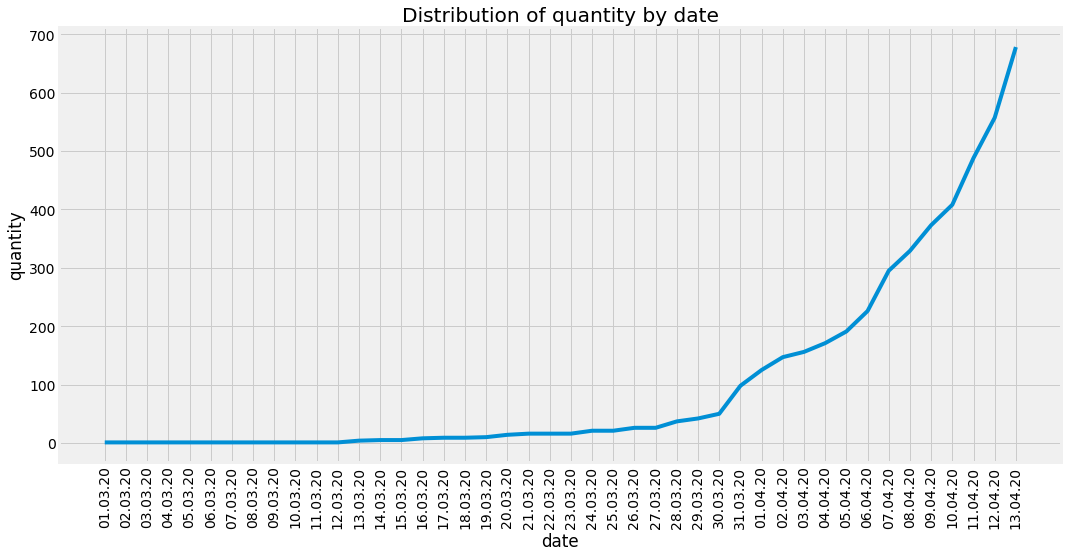

In [64]:
plt.figure(figsize = (16, 8))
plt.plot(train_df.date, train_df.quantity)
plt.xticks(rotation=90)
plt.ylabel('quantity')
plt.xlabel('date')
plt.title('Distribution of quantity by date')
plt.show()